# Logistic Regression:
   is a classification algorithm designed to predict categorical target labels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("hearing_test.csv")

In [3]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [4]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

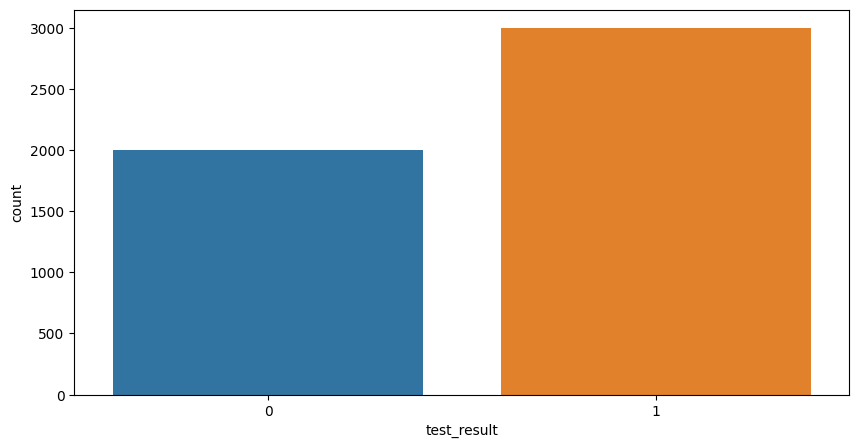

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['test_result'],data=df)

In [6]:
df.describe()

age  physical_score  test_result
count  5000.000000     5000.000000  5000.000000
mean     51.609000       32.760260     0.600000
std      11.287001        8.169802     0.489947
min      18.000000       -0.000000     0.000000
25%      43.000000       26.700000     0.000000
50%      51.000000       35.300000     1.000000
75%      60.000000       38.900000     1.000000
max      90.000000       50.000000     1.000000

<Axes: xlabel='test_result', ylabel='age'>

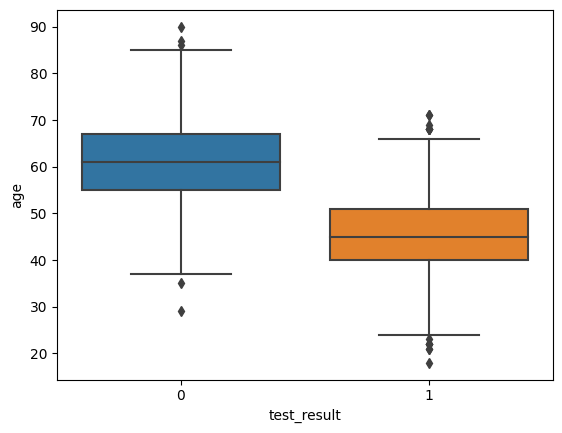

In [7]:
#  distribution of features per category
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

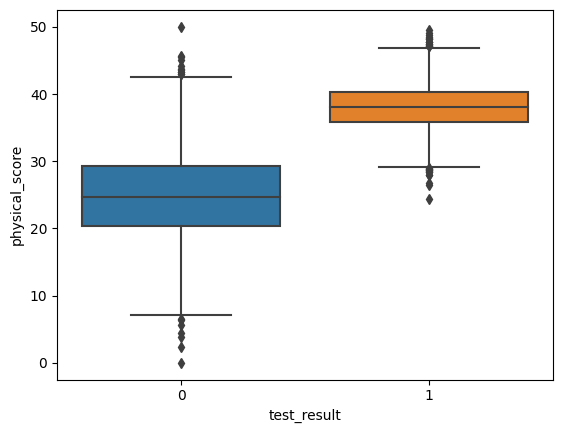

In [8]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

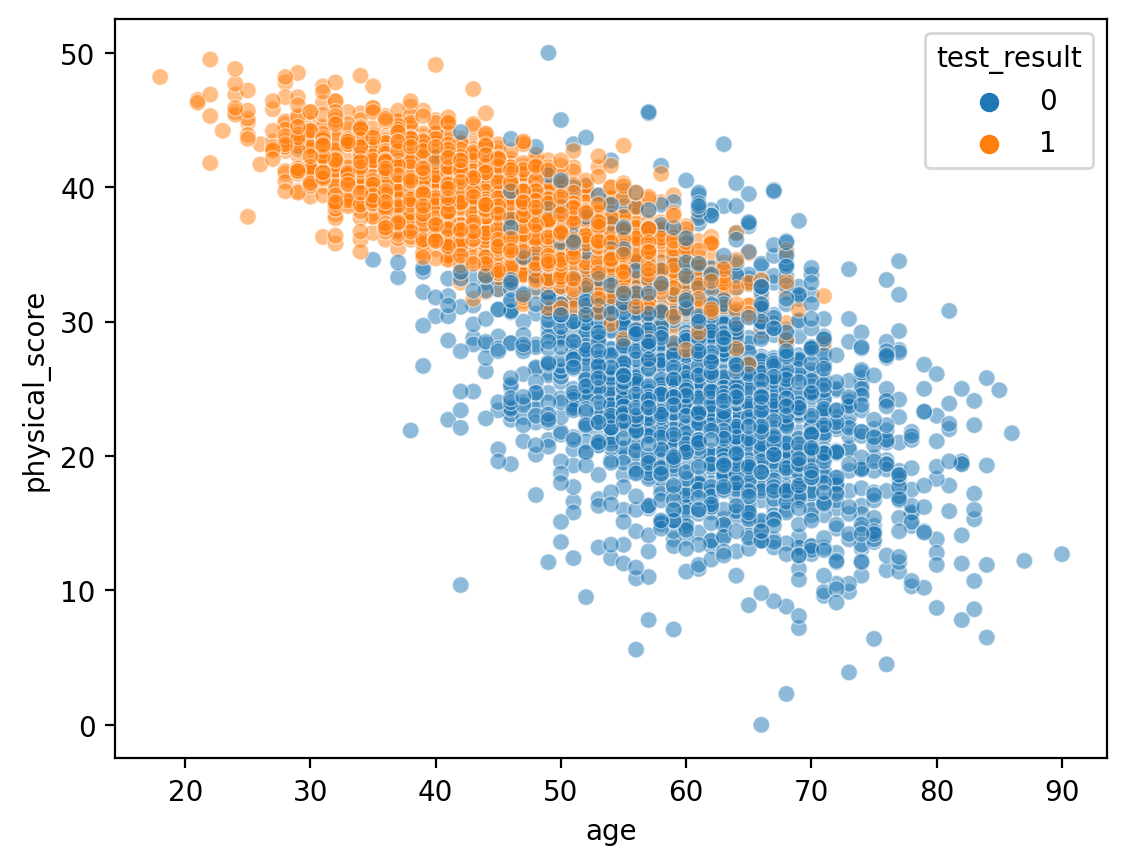

In [9]:
plt.figure(dpi=200)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.5)

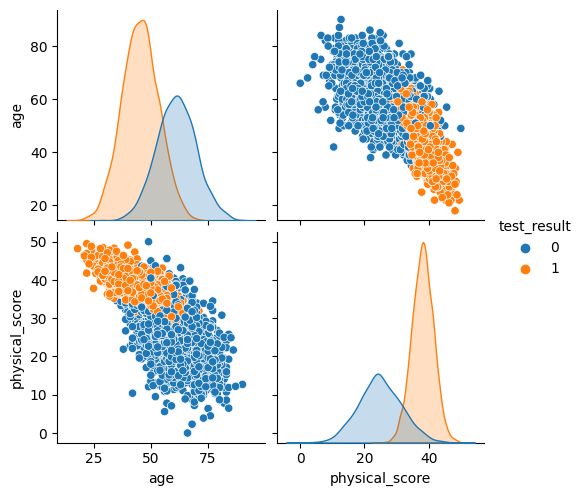

In [10]:
sns.pairplot(data=df,hue='test_result')

<Axes: >

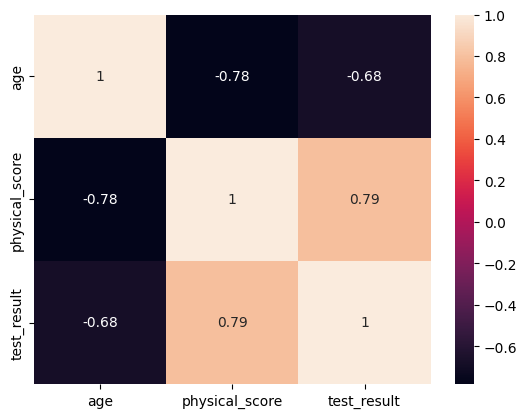

In [11]:
#  heatmap of correlation among features
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

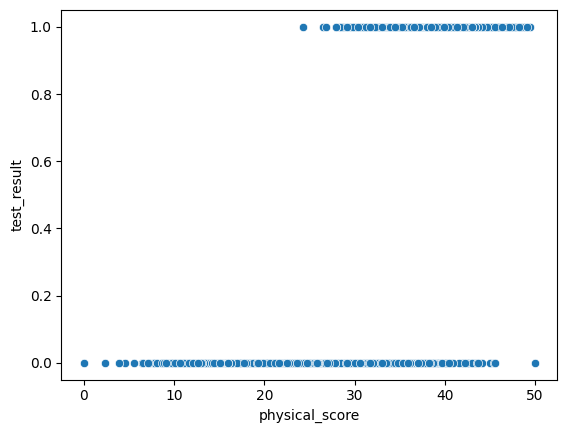

In [12]:
#  sometime scatter plot is not informative like when we have classification data.
sns.scatterplot(x='physical_score',y='test_result',data=df)
#  here we can use box plot

# 3D scatterplot

In [13]:
from mpl_toolkits import mplot3d

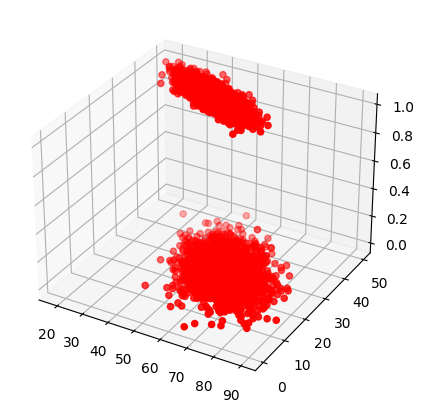

In [14]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection ="3d")
ax.scatter3D(df['age'], df['physical_score'], df['test_result'],c='red')

# training the model

In [15]:
X=df.drop('test_result',axis=1)

In [16]:
y=df['test_result']

In [17]:
#  train-test split
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
#  scaling the data
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
scaled_X_train=scaler.transform(X_train)

In [23]:
scaled_X_test=scaler.transform(X_test)

In [24]:
# fitting the model
from sklearn.linear_model import LogisticRegression

In [25]:
log_model=LogisticRegression()

In [26]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.91653034,  3.4506941 ]])

In [28]:
y_pred=log_model.predict_log_proba(scaled_X_test)

In [29]:
y_pred

array([[-3.71891746e+00, -2.45593432e-02],
       [-3.61370248e+00, -2.73217357e-02],
       [-1.14283457e-02, -4.47736727e+00],
       ...,
       [-8.14679624e-04, -7.11312293e+00],
       [-2.12100604e+00, -1.27732163e-01],
       [-2.38903951e+00, -9.62000848e-02]])

In [30]:
log_model.coef_    # these coef are in relation with class 1 -> -ve coef means if we increase this features's value
# then probability of X being in class 1 decreases, whereas if +ve ,then increases.

array([[-0.91653034,  3.4506941 ]])

In [31]:
#  we donot only rely on accurary metrics 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
y_pred=log_model.predict(scaled_X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.9206666666666666

In [39]:
cm=confusion_matrix(y_test,y_pred)

# visualizing the confusion matrix

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

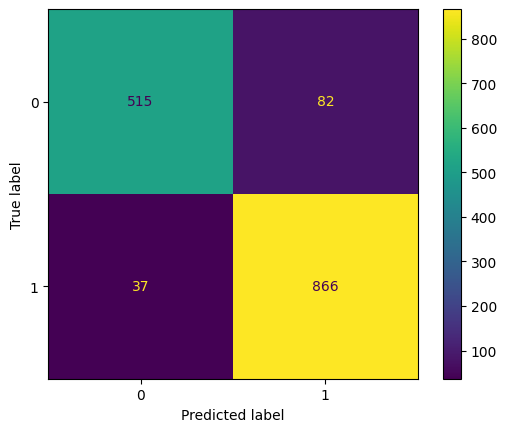

In [42]:
disp.plot()

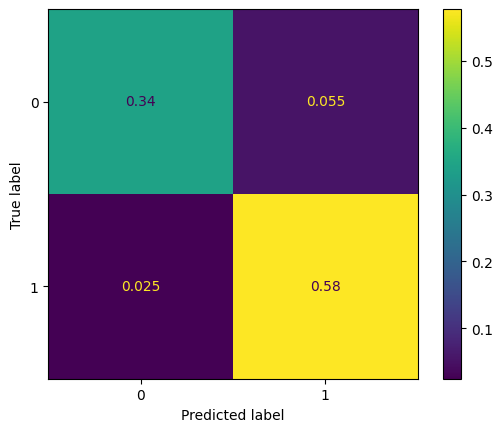

In [46]:
#  normalize
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test,normalize='all')

# classification report

In [47]:
#  it returns string so we should print this
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [51]:
#  accuracy is very close to precision and recall that means we have a balanced data set
#  macro avg -> standard mean
# weighted avg ->weight that based off no. of instances of that class

 # overall precision & recall score

In [52]:
from sklearn.metrics import precision_score,recall_score

In [53]:
precision_score(y_test,y_pred)

0.9135021097046413

In [54]:
recall_score(y_test,y_pred)

0.9590254706533776

# So here we are getting average,precision & recall scores above 90% so there are not any major issue on model being imbalanced.

In [55]:
# 

# ROC curve .from_estimator

In [68]:
from sklearn.metrics import RocCurveDisplay

<Figure size 1000x500 with 0 Axes>

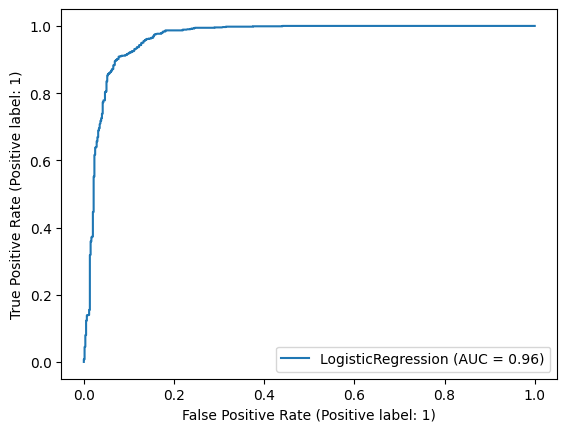

In [67]:
plt.figure(figsize=(10,5))
RocCurveDisplay.from_estimator(log_model,scaled_X_test, y_test)
plt.show()

# precision call curve .from_estimator

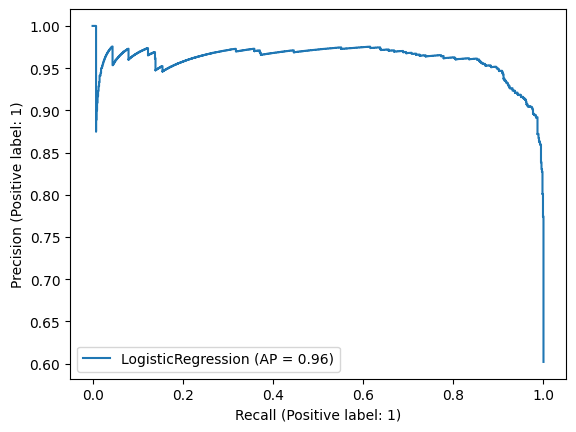

In [75]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

# probability for each points

In [76]:
log_model.predict_proba(scaled_X_test)

array([[2.42602163e-02, 9.75739784e-01],
       [2.69518731e-02, 9.73048127e-01],
       [9.88636710e-01, 1.13632902e-02],
       ...,
       [9.99185652e-01, 8.14347862e-04],
       [1.19910932e-01, 8.80089068e-01],
       [9.17177356e-02, 9.08282264e-01]])

In [77]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02426022, 0.97573978])

In [79]:
y_test[0]  # model predicts that it has 97% chance of belonging to class 1 &   2.3% chance of belonging to class 0

1